加载并处理数据

In [9]:
from sklearn import datasets
iris= datasets.load_iris()


X, y = iris.data, iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# 对特征排序,查看特征的重要性
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

print(rfc.feature_importances_)

# 为了方便直观的画图,这里有一个函数,也就是如果有两个特征,可以直接绘制出分类的图
# 从而通过随机森林的方式,查看特征的重要性,直接选择 3/4 特征

[0.08838844 0.0238286  0.52036954 0.36741342]


In [50]:
# 导入画图函数

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X_train, y_train, X_test, y_test, classifier):
    X = np.concatenate((X_train, X_test))
    y = np.concatenate((y_train, y_test))
    # 随机选择所有的
    markers = ('s', 'x', 'o', '^', 'v')
    # 随机选择所有的
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 每个类别的颜色还有marker
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([XX.ravel(), YY.ravel()]).T)
    Z = z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha=0.3, cmap=cmap)
    plt.xlim(XX.min(), XX.max())
    plt.ylim(YY.min(), YY.max())
    
    for i, c in enumerate(np.unique(y_train)):
        plt.scatter(x=X_train[y_train==c, 0],
                    y=X_train[y_train==c, 1],
                    alpha=0.8,
                    c=colors[i],
                    marker=markers[i],
                    label=c,
                    edgecolor='black')
    plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidths=1,
                marker='o',
                s=100,
                label='test set')
    plt.xlabel('petal lenght [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

0.9777777777777777


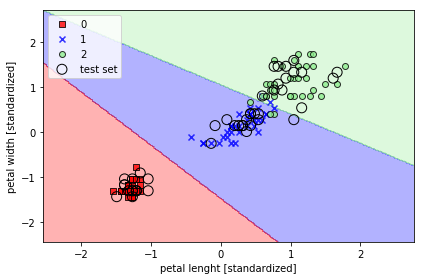

0.9777777777777777


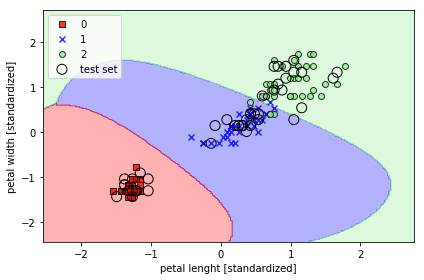

In [102]:
from sklearn import datasets
iris= datasets.load_iris()
X, y = iris.data[:, [2, 3]], iris.target

# 将现在的X/y作为数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# 标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
# 使用画图函数直观查看
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)

svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
# 使用画图函数直观查看
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)

异或问题, 用直线线性是不能够直接分割的

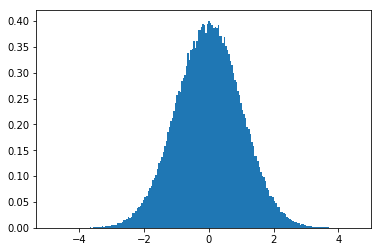

In [40]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.normal(0, 1, 200000)
plt.hist(s, bins=200, normed=True)
plt.show()

(-3, 3)

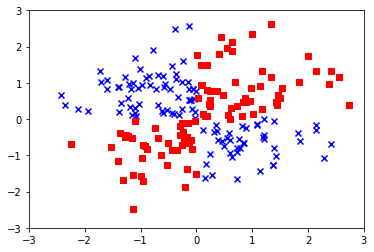

In [49]:
# 生成随机变量,否和 0 1 正太分布
# 构造数据,然后对其进行异或运算
import numpy as np
# shape 200,2
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
import matplotlib.pyplot as plt
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', 
            marker='x',
            label='1')
# 表示0列和1列值符号相同的样本
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])

0.44


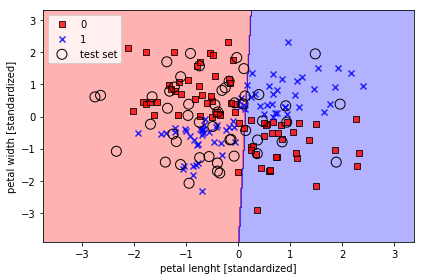

0.88


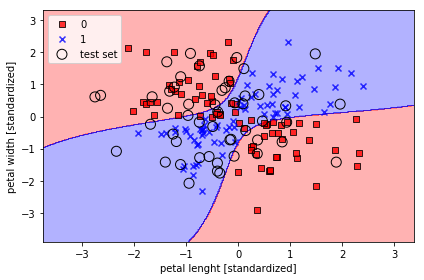

0.44


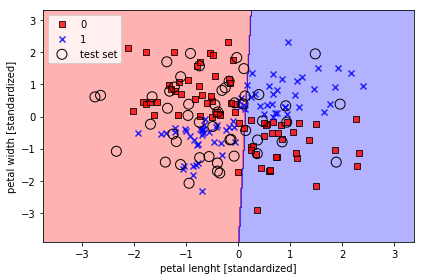

0.7


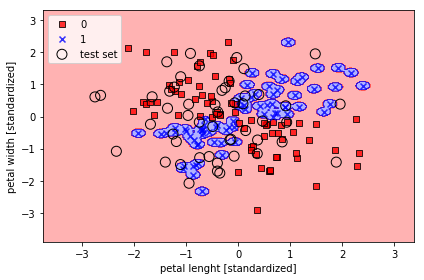

In [80]:
# 生成训练数据
import numpy as np
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.where(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 0, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

from sklearn.svm import SVC

svc = SVC(kernel='linear', gamma=0.1, C=10)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)


svc = SVC(kernel='rbf', gamma=0.1, C=10)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)


svc = SVC(kernel='linear', gamma=200, C=10)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)

svc = SVC(kernel='rbf', gamma=200, C=10)
svc.fit(X_train_std, y_train)
print(svc.score(X_test_std, y_test))
plot_decision_regions(X_train_std, y_train, X_test_std, y_test, svc)